# PlanetModel Class Tutorial

This notebook demonstrates how to use the `PlanetModel` class from SensRay to create, manipulate, and visualize 1D planetary models.

The `PlanetModel` class provides a comprehensive framework for working with radial planetary models, including:
- Storage of 1D property profiles (Vp, Vs, density, etc.)
- Management of internal discontinuities
- Property interpolation at arbitrary depths/radii
- Visualization capabilities
- Integration with standard Earth models

## Table of Contents
1. [Basic Model Creation](#basic)
2. [Adding Properties](#properties)
3. [Property Interpolation](#interpolation)
4. [Visualization](#visualization)
5. [Loading Standard Models](#standard)
6. [Model Operations](#operations)
7. [Different Planets](#planets)

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from sensray import PlanetModel

# Set up plotting style
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Basic Model Creation {#basic}

Let's start by creating a basic planetary model with standard Earth parameters.

In [ ]:
# Create a basic Earth model
earth_radius = 6371.0  # km

# Define major discontinuities (as radii from center)
discontinuities = [
    earth_radius - 35,    # Moho (~35 km depth)
    earth_radius - 660,   # 660 km discontinuity
    earth_radius - 2891,  # Core-mantle boundary
    earth_radius - 5150   # Inner-outer core boundary
]

# Create the model
earth_model = PlanetModel(
    radius=earth_radius,
    name="Tutorial Earth Model",
    discontinuities=discontinuities
)

print("Created Earth model:")
print(earth_model)
print(f"\nModel representation: {repr(earth_model)}")

Created Earth model:
Planet Model: Tutorial Earth Model
Radius: 6371.0 km
Discontinuities: 4
   1: r=1221.0 km (depth=5150.0 km)
   2: r=3480.0 km (depth=2891.0 km)
   3: r=5711.0 km (depth=660.0 km)
   4: r=6336.0 km (depth=35.0 km)
Properties: 0

Model representation: PlanetModel(name='Tutorial Earth Model', radius=6371.0 km, properties=0, discontinuities=4)


## 2. Adding Properties {#properties}

Now let's add some seismic property profiles to our model.

In [3]:
# Create depth array (surface to core-mantle boundary)
depths = np.linspace(0, 2891, 200)  # 0 to CMB depth
radii = earth_radius - depths       # Convert to radii

# Create realistic velocity profiles for the mantle
# Simple model: properties increase with depth

# P-wave velocity (km/s)
vp_surface = 6.0   # Surface velocity
vp_cmb = 13.7      # Velocity at CMB
vp = vp_surface + (vp_cmb - vp_surface) * (depths / 2891.0)

# S-wave velocity (using typical Vp/Vs ratio)
vs = vp / 1.73

# Density (g/cm³)
rho_surface = 2.7  # Surface density
rho_cmb = 5.5      # Density at CMB
rho = rho_surface + (rho_cmb - rho_surface) * (depths / 2891.0)

# Add properties to the model
earth_model.add_property('vp', radii, vp)
earth_model.add_property('vs', radii, vs)
earth_model.add_property('rho', radii, rho)

print("Added properties to the model:")
print(f"Available properties: {earth_model.get_property_names()}")
print(f"\nUpdated model:")
print(earth_model)

Added properties to the model:
Available properties: ['vp', 'vs', 'rho']

Updated model:
Planet Model: Tutorial Earth Model
Radius: 6371.0 km
Discontinuities: 4
   1: r=1221.0 km (depth=5150.0 km)
   2: r=3480.0 km (depth=2891.0 km)
   3: r=5711.0 km (depth=660.0 km)
   4: r=6336.0 km (depth=35.0 km)
Properties: 3
  rho: 200 points
  vp: 200 points
  vs: 200 points


## 3. Property Interpolation {#interpolation}

The model allows us to interpolate properties at any depth or radius.

In [4]:
# Test interpolation at specific depths
test_depths = [0, 100, 500, 1000, 2000]

print("Property interpolation at different depths:")
print(f"{'Depth (km)':>10} {'Vp (km/s)':>10} {'Vs (km/s)':>10} {'ρ (g/cm³)':>12}")
print("-" * 45)

for depth in test_depths:
    vp_val = earth_model.get_property_at_depth('vp', depth)
    vs_val = earth_model.get_property_at_depth('vs', depth)
    rho_val = earth_model.get_property_at_depth('rho', depth)
    print(f"{depth:>10.0f} {vp_val:>10.2f} {vs_val:>10.2f} {rho_val:>12.2f}")

# Test array interpolation
depth_array = np.array([50, 150, 250, 350, 450])
vp_array = earth_model.get_property_at_depth('vp', depth_array)

print(f"\nArray interpolation:")
print(f"Depths: {depth_array}")
print(f"Vp values: {vp_array.round(2)}")

Property interpolation at different depths:
Depth (km)  Vp (km/s)  Vs (km/s)    ρ (g/cm³)
---------------------------------------------
         0       6.00       3.47         2.70
       100       6.27       3.62         2.80
       500       7.33       4.24         3.18
      1000       8.66       5.01         3.67
      2000      11.33       6.55         4.64

Array interpolation:
Depths: [ 50 150 250 350 450]
Vp values: [6.13 6.4  6.67 6.93 7.2 ]


## 4. Visualization {#visualization}

The `PlanetModel` class provides built-in plotting capabilities.

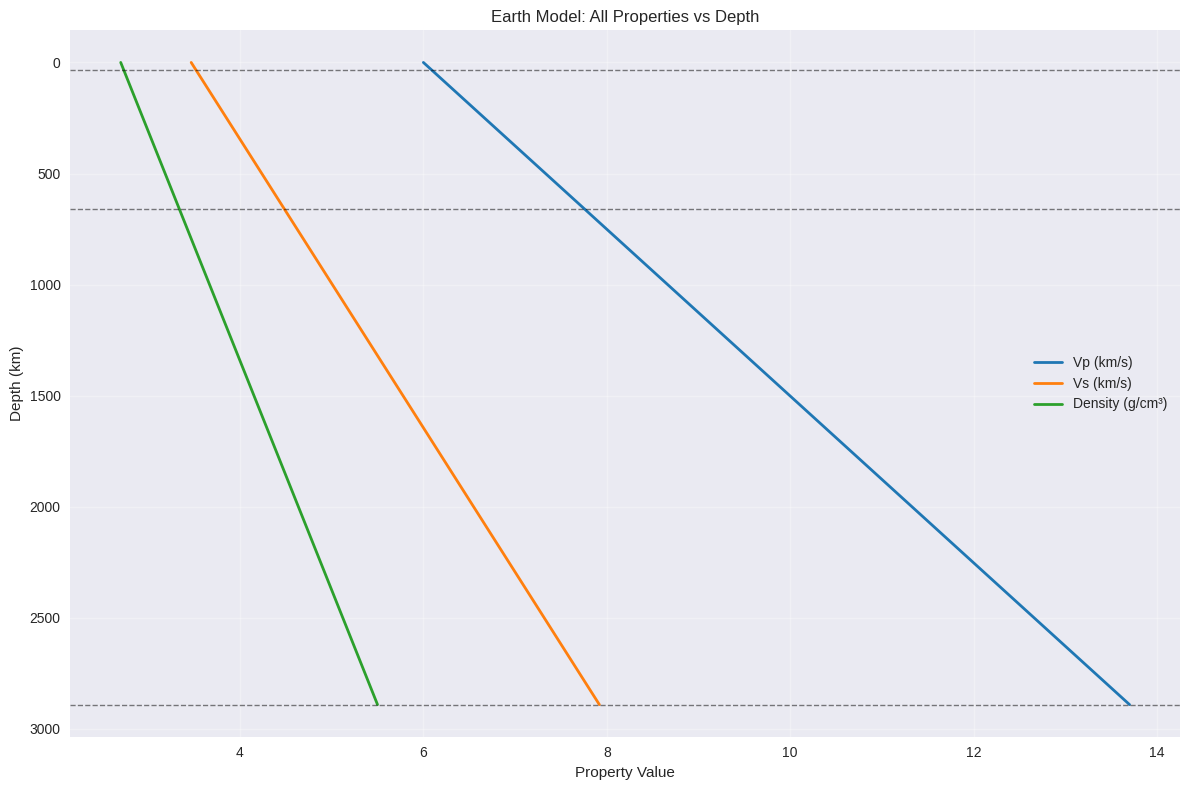

In [5]:
# Plot all properties vs depth
fig = earth_model.plot_profiles(
    use_depth=True,
    show_discontinuities=True,
    max_depth_km=2891,
    fig_size=(12, 8)
)
plt.title("Earth Model: All Properties vs Depth")
plt.show()

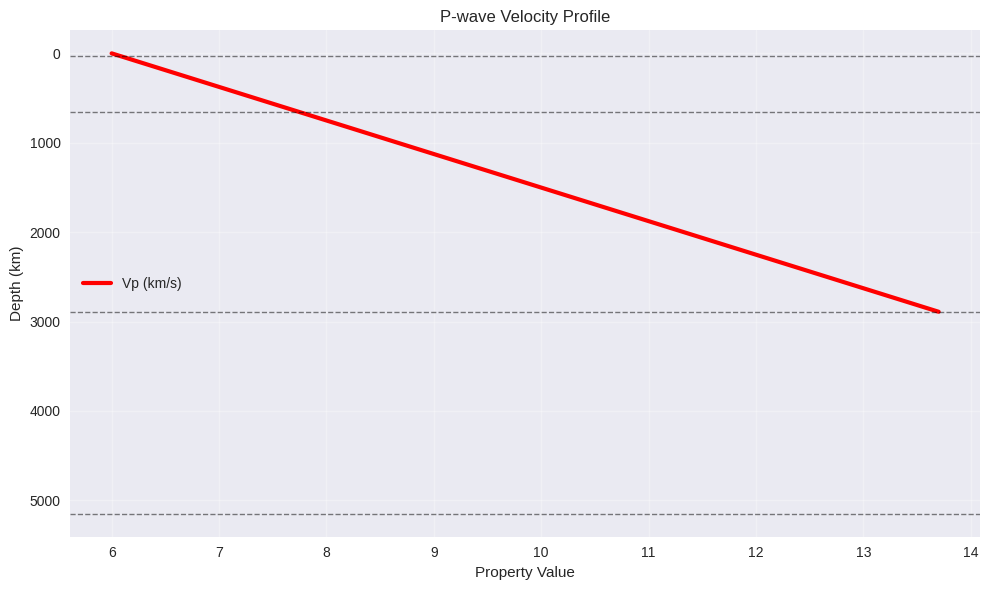

In [6]:
# Plot single property with custom styling
fig = earth_model.plot_property(
    'vp',
    use_depth=True,
    color='red',
    line_width=3.0,
    show_discontinuities=True,
    fig_size=(10, 6)
)
plt.title("P-wave Velocity Profile")
plt.show()

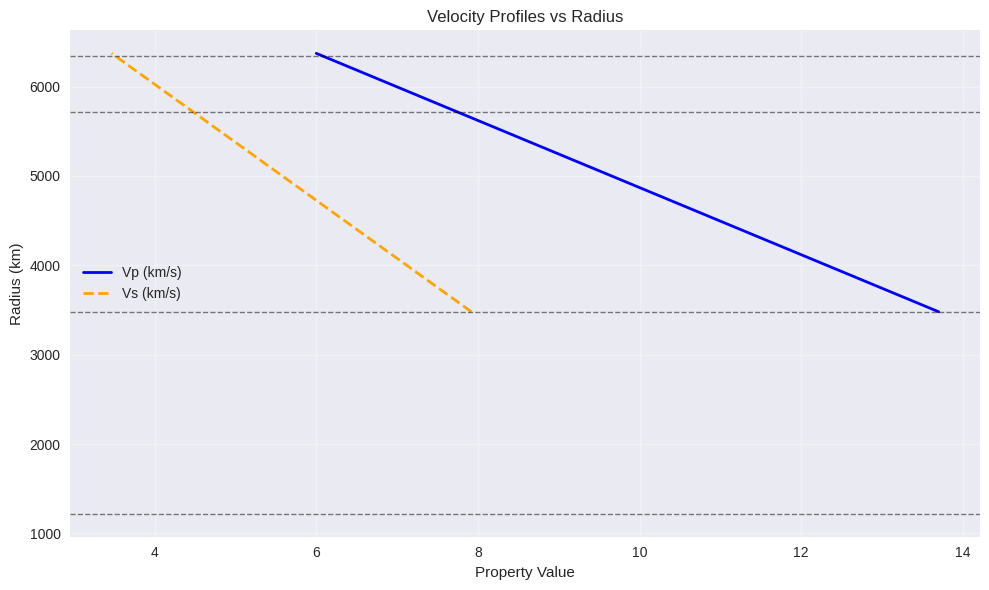

In [7]:
# Plot vs radius instead of depth
fig = earth_model.plot_profiles(
    properties=['vp', 'vs'],
    use_depth=False,  # Plot vs radius
    show_discontinuities=True,
    colors={'vp': 'blue', 'vs': 'orange'},
    line_styles={'vp': '-', 'vs': '--'},
    line_widths={'vp': 2, 'vs': 2},
    fig_size=(10, 6)
)
plt.title("Velocity Profiles vs Radius")
plt.show()

## 5. Loading Standard Models {#standard}

The class can load standard Earth models directly from ObsPy TauP.

**Note**: This requires ObsPy to be installed. If not available, we'll create a synthetic model instead.

Successfully loaded PREM model:
Planet Model: PREM
Radius: 6371.0 km
Discontinuities: 3
   1: r=1221.0 km (depth=5150.0 km)
   2: r=3480.0 km (depth=2891.0 km)
   3: r=6336.0 km (depth=35.0 km)
Properties: 3
  rho: 81 points
  vp: 81 points
  vs: 81 points


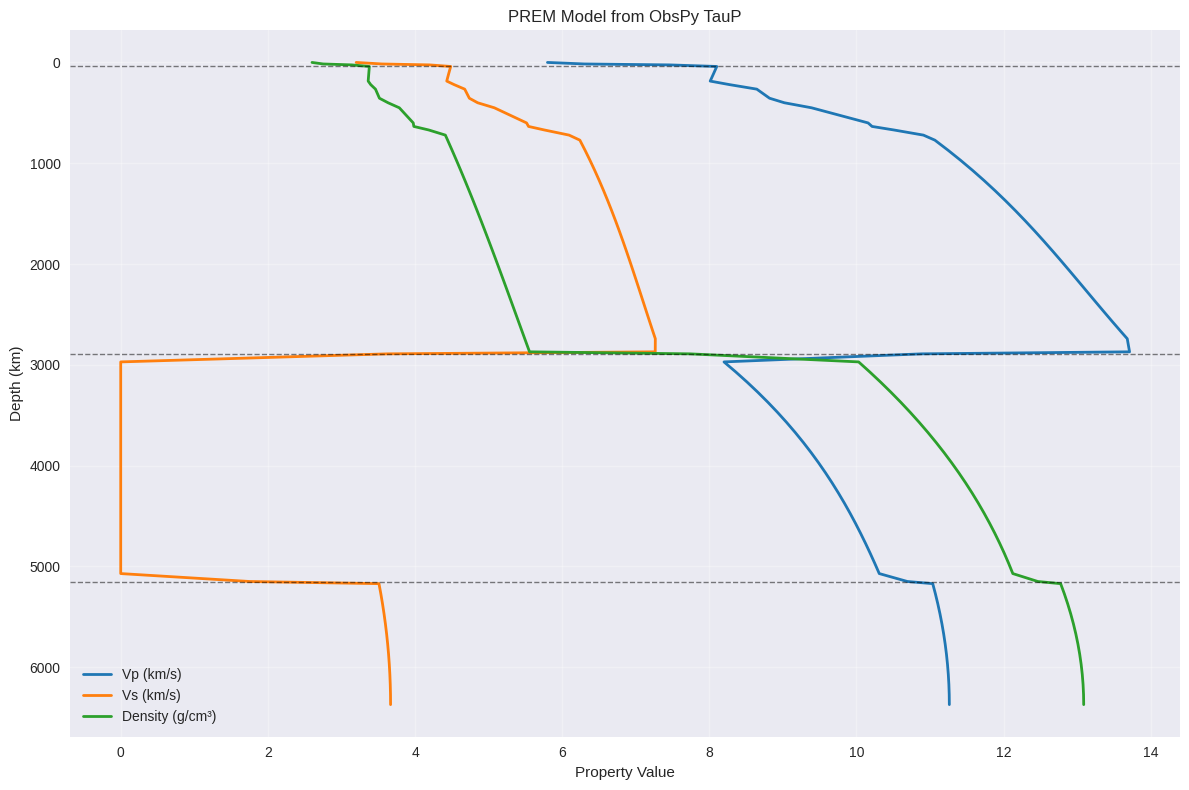

In [14]:
# Try to load a standard model
try:
    # Load PREM model
    prem_model = PlanetModel.from_standard_model(
        'prem',
        properties=['vp', 'vs', 'rho'],
        max_depth_km=6371  # Only mantle
    )

    print("Successfully loaded PREM model:")
    print(prem_model)

    # Plot PREM
    fig = prem_model.plot_profiles(
        use_depth=True,
        show_discontinuities=True,
        fig_size=(12, 8)
    )
    plt.title("PREM Model from ObsPy TauP")
    plt.show()

except ImportError:
    print("ObsPy not available - creating synthetic PREM-like model instead")

    # Create a PREM-like synthetic model
    prem_depths = np.linspace(0, 2891, 150)
    prem_radii = 6371.0 - prem_depths

    # PREM-like profiles (simplified)
    prem_vp = 8.11 + 0.0 * prem_depths/1000  # Simplified upper mantle
    prem_vp[prem_depths > 220] = 8.11 + 1.5 * ((prem_depths[prem_depths > 220] - 220) / 2671)

    prem_vs = prem_vp / 1.75
    prem_rho = 3.3 + 1.8 * (prem_depths / 2891)

    prem_model = PlanetModel(
        radius=6371.0,
        name="Synthetic PREM-like",
        discontinuities=[6371-35, 6371-220, 6371-660, 6371-2891]
    )

    prem_model.add_property('vp', prem_radii, prem_vp)
    prem_model.add_property('vs', prem_radii, prem_vs)
    prem_model.add_property('rho', prem_radii, prem_rho)

    print("Created synthetic PREM-like model:")
    print(prem_model)

    # Plot synthetic PREM
    fig = prem_model.plot_profiles(
        use_depth=True,
        show_discontinuities=True,
        fig_size=(12, 8)
    )
    plt.title("Synthetic PREM-like Model")
    plt.show()

## 6. Model Operations {#operations}

The class provides various operations for model manipulation and analysis.

In [9]:
# Get detailed model information
info = earth_model.get_info()

print("Detailed model information:")
for key, value in info.items():
    if key == 'property_statistics':
        print(f"\n{key}:")
        for prop, stats in value.items():
            print(f"  {prop}: {stats['n_points']} points, "
                  f"range {stats['min_value']:.2f}-{stats['max_value']:.2f}")
    else:
        print(f"{key}: {value}")

Detailed model information:
name: Tutorial Earth Model
radius_km: 6371.0
properties: ['vp', 'vs', 'rho']
n_properties: 3
discontinuities: [1221.0, 3480.0, 5711.0, 6336.0]
n_discontinuities: 4
metadata: {}
discontinuity_depths_km: [5150.0, 2891.0, 660.0, 35.0]

property_statistics:
  vp: 200 points, range 6.00-13.70
  vs: 200 points, range 3.47-7.92
  rho: 200 points, range 2.70-5.50


In [10]:
# Test serialization (save/load)
print("Testing serialization...")

# Convert to dictionary
model_dict = earth_model.to_dict()
print(f"Model serialized to dict with keys: {list(model_dict.keys())}")

# Recreate from dictionary
earth_model_copy = PlanetModel.from_dict(model_dict)
print(f"Recreated model: {earth_model_copy.name}")

# Verify they're identical
original_vp = earth_model.get_property_at_depth('vp', 1000)
copy_vp = earth_model_copy.get_property_at_depth('vp', 1000)
print(f"Vp at 1000 km - Original: {original_vp:.3f}, Copy: {copy_vp:.3f}")
print(f"Serialization successful: {abs(original_vp - copy_vp) < 1e-10}")

Testing serialization...
Model serialized to dict with keys: ['radius', 'name', 'discontinuities', 'metadata', 'properties']
Recreated model: Tutorial Earth Model
Vp at 1000 km - Original: 8.663, Copy: 8.663
Serialization successful: True


Adding Q factors...
Updated properties: ['vp', 'vs', 'rho', 'qp', 'qs']


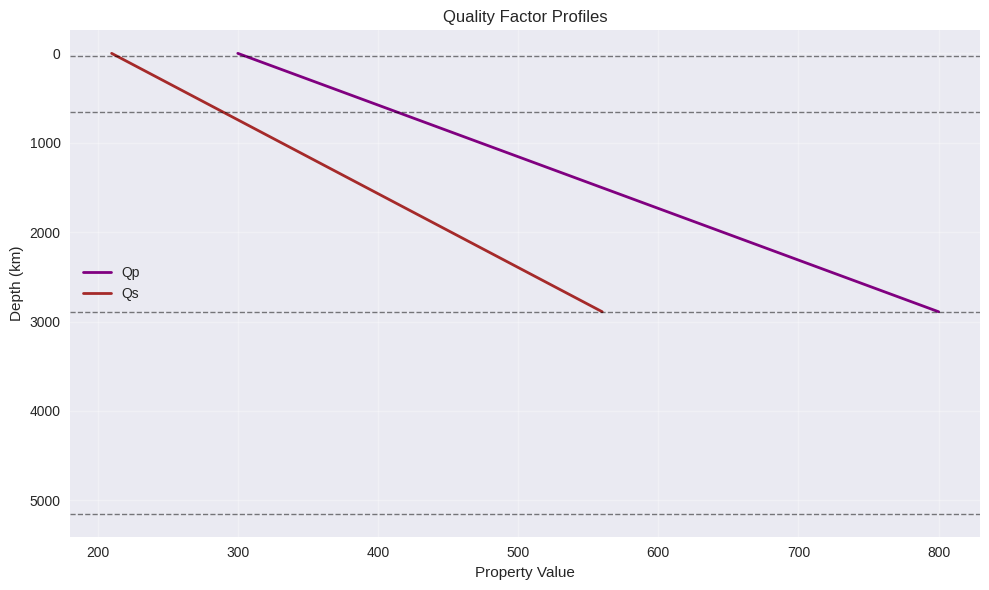

In [11]:
# Add additional properties dynamically
print("Adding Q factors...")

# Create Q factor profiles (quality factors for attenuation)
qp = 300 + 500 * (depths / 2891.0)  # Qp increases with depth
qs = qp * 0.7  # Typical Qs/Qp ratio

earth_model.add_property('qp', radii, qp)
earth_model.add_property('qs', radii, qs)

print(f"Updated properties: {earth_model.get_property_names()}")

# Plot the new properties
fig = earth_model.plot_profiles(
    properties=['qp', 'qs'],
    use_depth=True,
    colors={'qp': 'purple', 'qs': 'brown'},
    show_discontinuities=True,
    fig_size=(10, 6)
)
plt.title("Quality Factor Profiles")
plt.show()

## 7. Different Planets {#planets}

The `PlanetModel` class can represent any planetary body, not just Earth.

In [12]:
# Create models for different planets
planets = {
    'Mars': {
        'radius': 3390.0,  # km
        'discontinuities': [3390-50, 3390-1500],  # Crust and core
        'vp_surface': 3.5,
        'vp_deep': 7.0,
        'rho_surface': 3.0,
        'rho_deep': 5.0
    },
    'Moon': {
        'radius': 1737.0,  # km
        'discontinuities': [1737-60, 1737-500],  # Crust and partial melt zone
        'vp_surface': 2.0,
        'vp_deep': 6.0,
        'rho_surface': 2.5,
        'rho_deep': 4.0
    }
}

planet_models = {}

for planet_name, params in planets.items():
    # Create depth array
    max_depth = params['radius'] * 0.8  # Use 80% of radius
    depths = np.linspace(0, max_depth, 100)
    radii = params['radius'] - depths

    # Create simple velocity profiles
    vp = (params['vp_surface'] +
          (params['vp_deep'] - params['vp_surface']) * (depths / max_depth))
    vs = vp / 1.8  # Assume higher Vp/Vs ratio
    rho = (params['rho_surface'] +
           (params['rho_deep'] - params['rho_surface']) * (depths / max_depth))

    # Create model
    model = PlanetModel(
        radius=params['radius'],
        name=planet_name,
        discontinuities=params['discontinuities']
    )

    model.add_property('vp', radii, vp)
    model.add_property('vs', radii, vs)
    model.add_property('rho', radii, rho)

    planet_models[planet_name] = model

    print(f"Created {planet_name} model:")
    print(f"  Radius: {params['radius']} km")
    print(f"  Discontinuities: {len(params['discontinuities'])}")
    print(f"  Properties: {model.get_property_names()}")
    print()

Created Mars model:
  Radius: 3390.0 km
  Discontinuities: 2
  Properties: ['vp', 'vs', 'rho']

Created Moon model:
  Radius: 1737.0 km
  Discontinuities: 2
  Properties: ['vp', 'vs', 'rho']



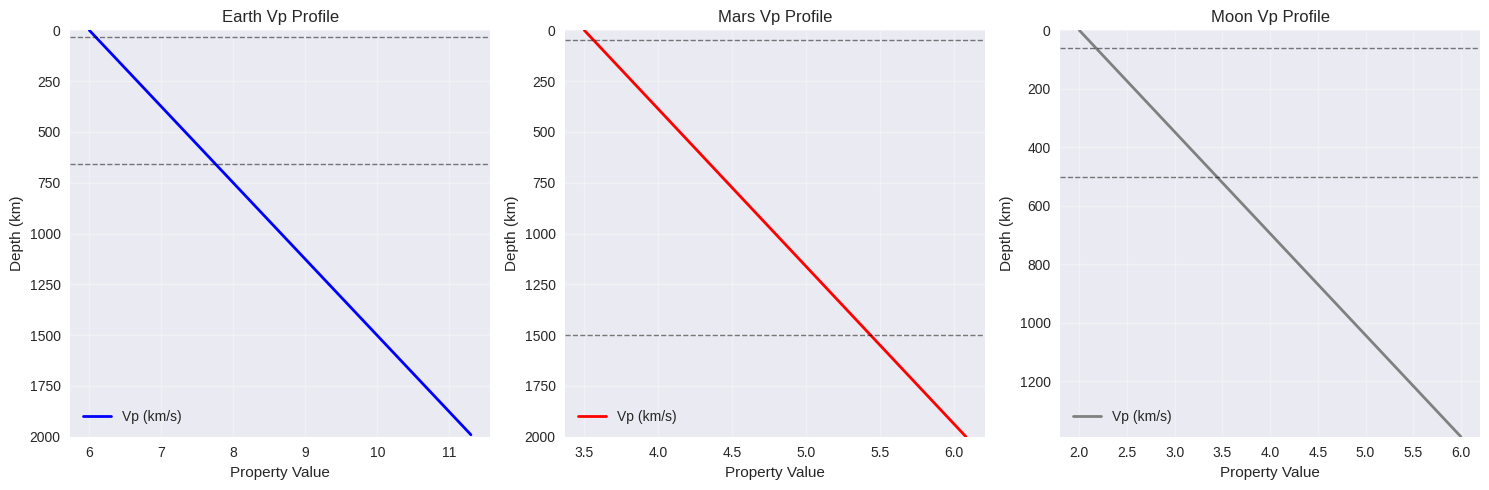

In [13]:
# Compare planetary models
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models_to_plot = [earth_model, planet_models['Mars'], planet_models['Moon']]
model_names = ['Earth', 'Mars', 'Moon']
colors = ['blue', 'red', 'gray']

for i, (model, name, color) in enumerate(zip(models_to_plot, model_names, colors)):
    # Get depth range for this model
    depth_range = model.get_depth_range()
    max_plot_depth = min(depth_range[1], 2000)  # Limit for visibility

    # Plot Vp profile
    model.plot_property(
        'vp',
        use_depth=True,
        max_depth_km=max_plot_depth,
        color=color,
        ax=axes[i],
        show_discontinuities=True
    )
    axes[i].set_title(f'{name} Vp Profile')
    axes[i].set_ylim(max_plot_depth, 0)  # Depth increases downward

plt.tight_layout()
plt.show()